In [189]:
# Import necessary packages
import os 
import folium
from folium import plugins
import earthpy as et
import earthpy.spatial as es
import pandas as pd
import numpy as np
from math import log10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
data = pd.read_csv('./owid-co2-data.csv')

In [168]:
data_location = pd.read_csv('country_location.csv')

In [169]:
from tqdm.notebook import tqdm, trange
latitude = []
long = []
for i in data["country"]:
    try:
        idx = pd.Index(data_location['Country']).get_loc(i)
        latitude.append(data_location['Latitude'][idx]) #, location.longitude)
        long.append(data_location['Longitude'][idx])
    except:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))

In [170]:
data['longitude']=long
data['latitude']=latitude
data_new = data[data['latitude'].notna()]

In [171]:
def pointMap(year, attribute):
    data_year = data_new[data_new['year']==year]#.reset_index()
    data_year = data_year[data_year[attribute].notna()].reset_index()
    m = folium.Map(location=[0, 0], 
               zoom_start=2.5,
               tiles = 'Stamen Terrain')

    for i in range(len(data_year)):
        folium.CircleMarker(
            location=[data_year['latitude'][i], data_year['longitude'][i]],
            radius=4*log10(data_year[attribute][i]+10),
            #popup=str(data_2000['co2'][i]),
            popup=data_year['country'][i]+" "+str(data_year[attribute][i]),
            color="#3186cc",
            fill=True,
            fill_color="#3186cc",
        ).add_to(m)
        
    display(m)   


def heatMap(attribute, year, zoom):
    data_year = data_new[data_new['year']==year]#.reset_index()
    data_year = data_year[data_year[attribute].notna()].reset_index()
    m = folium.Map(location=[0, 0], 
                zoom_start=zoom,
                tiles = 'Stamen Terrain',zoom_control=False,control_scale=True,no_touch=True)
    heat_data = data_year[['latitude','longitude',attribute]]
    hm = plugins.HeatMap(heat_data,auto_play=False,radius=15.0)
    hm.add_to(m)
    display(m) 

In [172]:
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
x = [i for i in range(1980,2020)]
list_attributes=list(data.columns[3:-2])
#interact(pointMap, year=x, attribute=list_attributes)

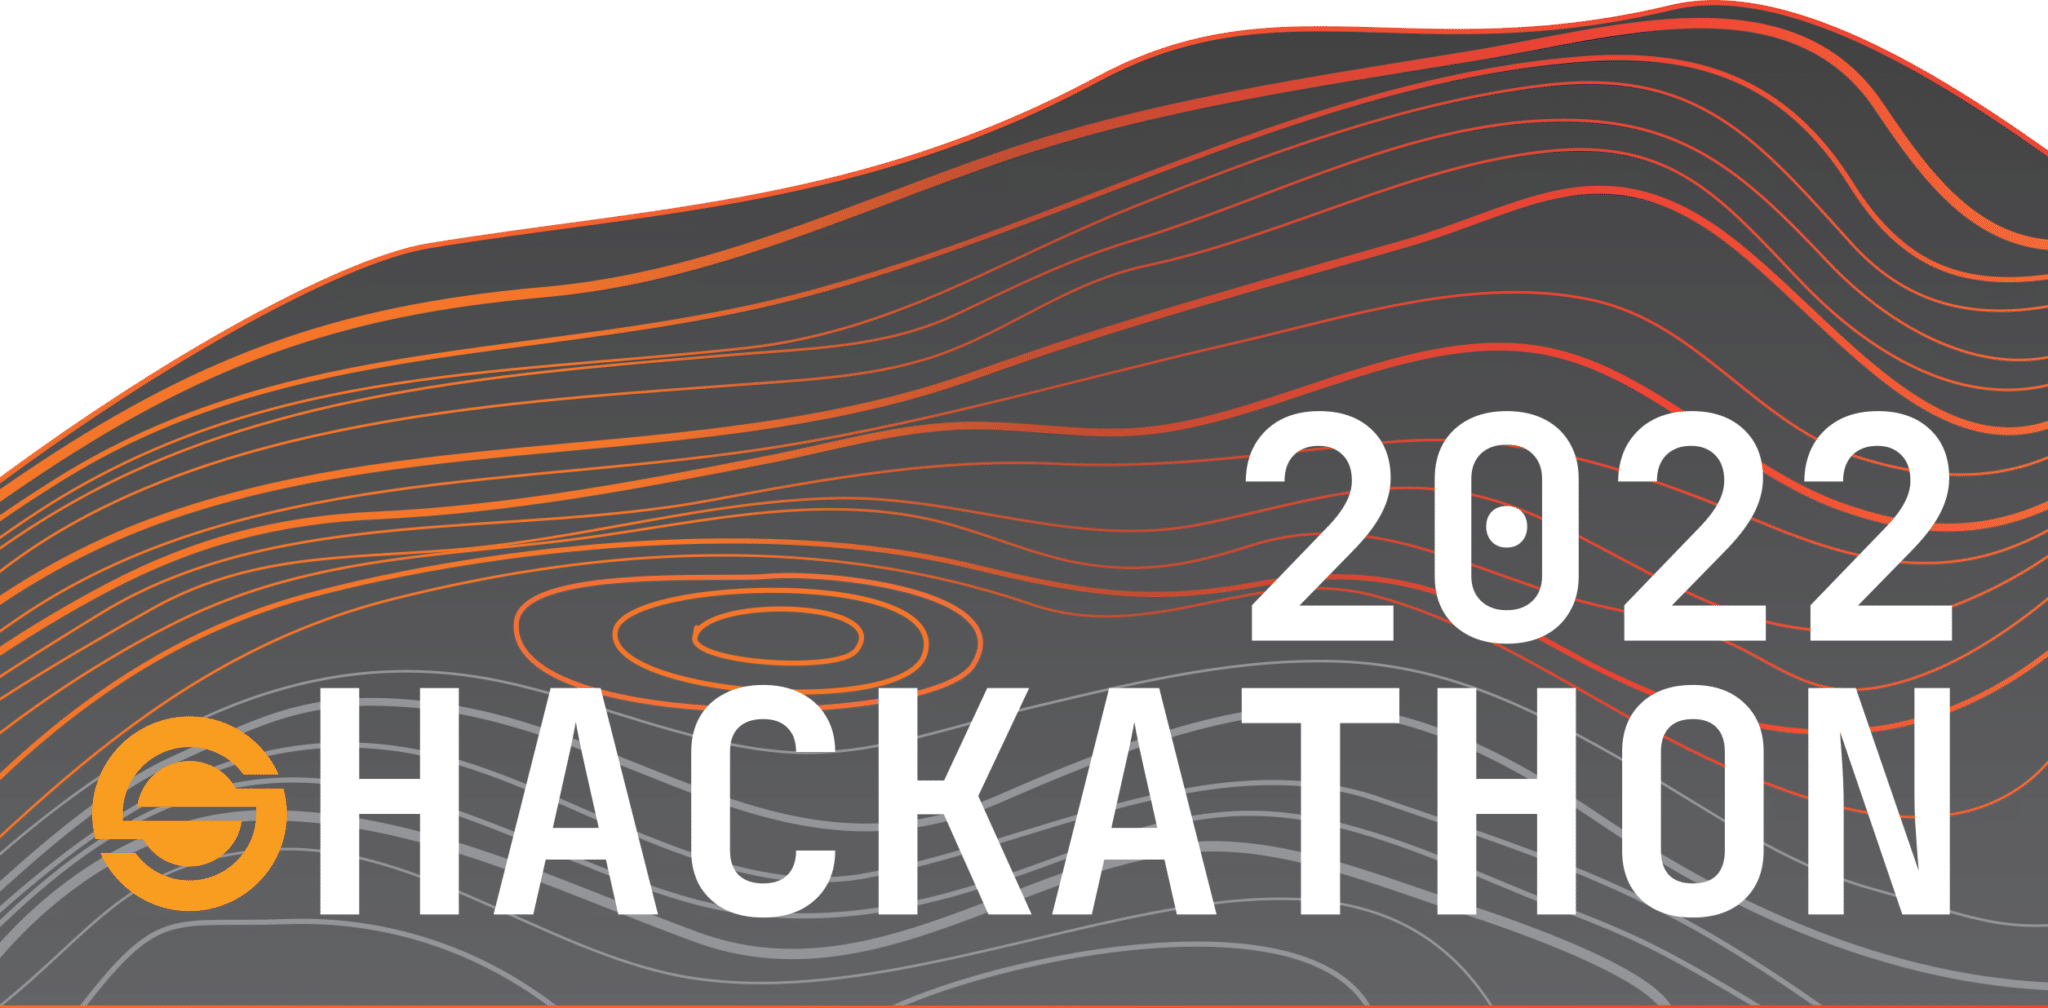

In [180]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename = "C:/Users/jerok/Documents/SWhackaton/SWhackaton2022/Hackathon-2022.png", width=300, height=300,retina=False)


In [186]:
display(HTML('<h1>C02 emmisions Of The World by The Seiswinners</h1><p>Interactive map of the world highlighting Greenhouse gas emissions.  This map will show how important energy is for humanity and that CO2 emission and wellbeing are opposing forces. Please see it by yourself by changing the attribute, year and zoom in the application. </p1>'))

In [183]:
interact(heatMap, attribute=list_attributes, year=(1980,2020,1),zoom=(1.5,4.5,0.5))



interactive(children=(Dropdown(description='attribute', options=('co2', 'co2_per_capita', 'trade_co2', 'cement…

<function __main__.heatMap(attribute, year, zoom)>

In [ ]:
dfRaw = pd.read_csv('owid-co2-data.csv')

dfRaw['year'] = pd.to_datetime(dfRaw['year'], format='%Y')

df = dfRaw.set_index('year')

In [193]:
# Calculate total production per year
dfSum = pd.DataFrame()

dfSum['co2'] = df.groupby(['year'])['co2'].sum()
dfSum['year'] = dfSum.index
dfSum['year'] = dfSum.year.dt.year

plt.plot(dfSum['year'], dfSum['co2'])

plt.title("Total CO2 emission per year");


NameError: name 'df' is not defined

In [194]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train

ARMAmodel = SARIMAX(y, order = (1,2,2))
ARMAmodel_fit = ARMAmodel.fit()
num_years = 30
forecast = ARMAmodel2_fit.forecast(num_years)

year_start = y.index[-1].year+1
years = [*range(year_start, year_start + num_years)]

forecastDf = pd.DataFrame(index = years)
forecastDf['co2'] = forecast.values
forecastDf['co2']
forecastDf.year = forecastDf.index

forecastDf['co2NEW'] = forecastDf['co2'] + np.median(y)

NameError: name 'train' is not defined